# Lídia Montero - URL Repositori pública
# Anàlisi Exploratòria de bank_data.CSV
## Carregar llibreries tal com suggereix la plantilla_EDA

## Carregar les dades

In [239]:
csv_url = "https://raw.githubusercontent.com/ITACADEMYprojectes/projecteML/main/bank_dataset.CSV"
df = pd.read_csv(csv_url)

## Informació general, primeres files i sumari estadístic

In [250]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Histogrames per les variables numèriques

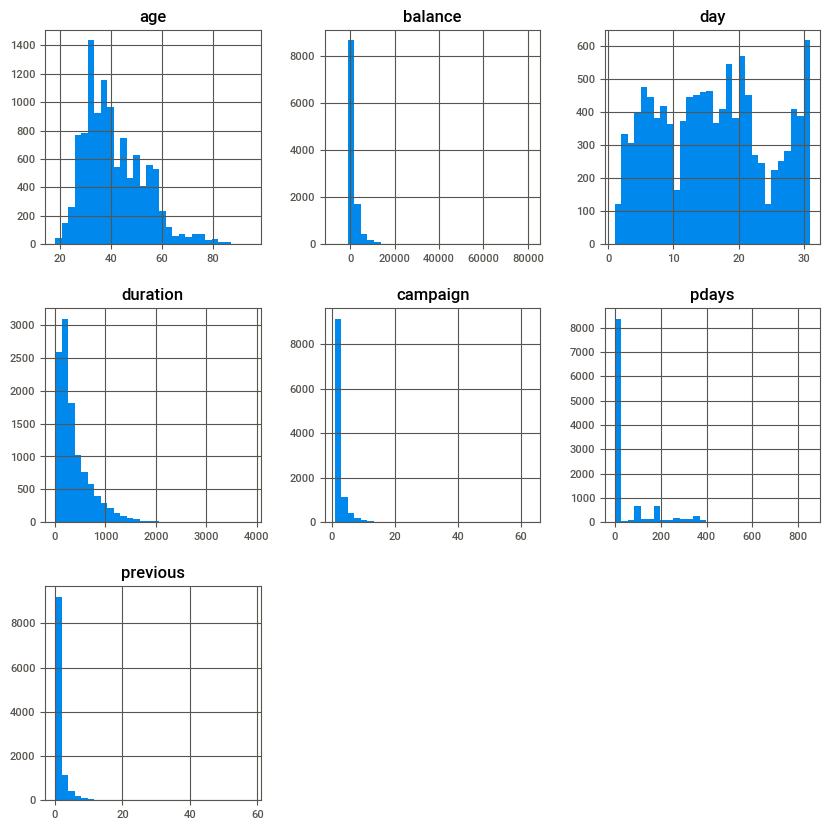

In [253]:
vars_con = [1,5,9,11,12,13,14]
vars_fac = [2,3,4,6,7,8,10,15,16]
df.hist(bins=30, figsize=(10, 10))
plt.show()

## Boxplot per detecció d'outliers univariants en les variables numèriques

No és gaire informatiu doncs les escales són molt diferents. 

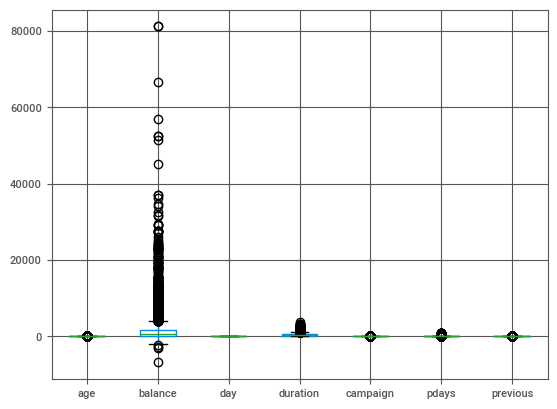

In [256]:
df.boxplot()
plt.show()

### Anàlisi una a una de les variables numèriques per detectar outliers
Després d'examinar el boxplot i calcular les fites superiors als outliers suaus i severs decideixo no intervenir: els outliers d'age són correctes, raonables i no cal intervenció en aquest punt, potser desestimar les persones més grans de 80 anys en la modelització (dificultats de comprensió dels productes finances, jo crec que majorment no n'estan interessats).

32.0
49.0
IQR 17.0
Llindar superior outliers suaus 74.5
Llindar superior outliers severs 100.0


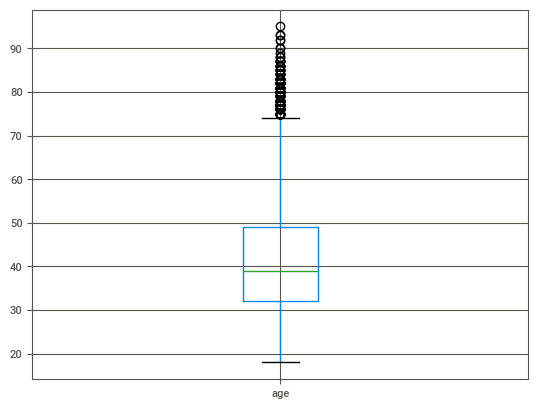

In [259]:
p = df.boxplot(column=['age'], return_type='axes')
p.plot()
print( df['age'].quantile(0.25))
print( df['age'].quantile(0.75)) 

# 50% de la població està entre 32 i 49
# Llindars per outliers suaus
# print(np.min(edat), np.quantile(edat, 0.25), np.median(edat), np.quantile(edat, 0.75), np.max(edat))
iqr = df['age'].quantile(0.75)-df['age'].quantile(0.25)
print("IQR",iqr)
upthr = df['age'].quantile(0.75)+1.5*iqr
print("Llindar superior outliers suaus",upthr)
print("Llindar superior outliers severs",df['age'].quantile(0.75)+3*iqr)
# Per ara no cal tractar els outliers d'age

#### Balance
Distribució extrema, tipus Pareto, per tant els outliers són consustancials, però a partir de 40000 caldria suprimir les observacions 
o millor imputar-les a la mediana. Quines són?. Hi ha outliers severs inferiors que per ara decideixo no tractar.


Llindar superior outliers suaus 4087.0
Llindar superior outliers severs 6466.0
Llindar inferior outliers severs -4636.0


-6847

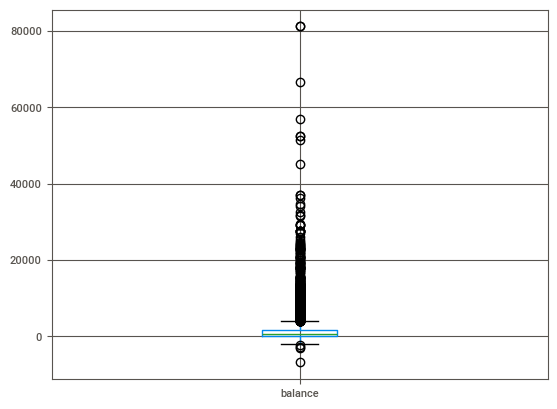

In [265]:
p = df.boxplot(column=['balance'], return_type='axes')
p.plot()
# 50% de la població està entre 32 i 49
# Llindars per outliers suaus
iqr = df['balance'].quantile(0.75)-df['balance'].quantile(0.25)
iqr
upthr = df['balance'].quantile(0.75)+1.5*iqr
print("Llindar superior outliers suaus",upthr)
upthr = df['balance'].quantile(0.75)+3*iqr
print("Llindar superior outliers severs",upthr)
lothr = df['balance'].quantile(0.25)-3*iqr
print("Llindar inferior outliers severs",lothr)
df['balance'].min()

[]

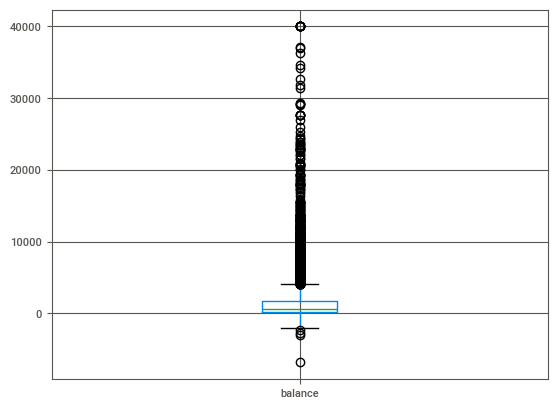

In [214]:
cols = ['balance']
df.loc[df['balance'] > 40000, cols] = 40000
# print( df.isnull().sum())
#df['balance'] = df['balance'].fillna(df['balance'].median())
p = df.boxplot(column=['balance'], return_type='axes')
p.plot()

#### Day
Cap problema com era d'esperar a day

Llindar superior outliers suaus 43.0
Llindar superior outliers severs 64.0


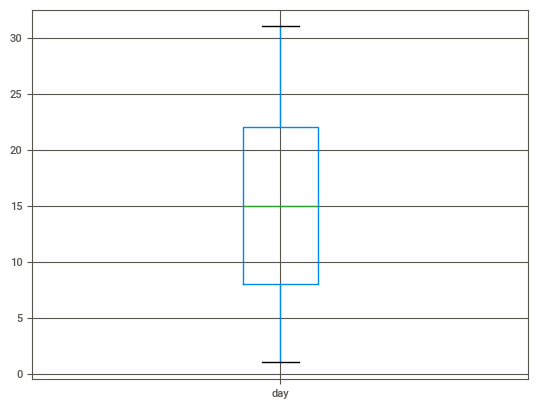

In [216]:
p = df.boxplot(column=['day'], return_type='axes')
p.plot()
# Llindars per outliers suaus
iqr = df['day'].quantile(0.75)-df['day'].quantile(0.25)
iqr
upthr = df['day'].quantile(0.75)+1.5*iqr
print("Llindar superior outliers suaus",upthr)
upthr = df['day'].quantile(0.75)+3*iqr
print("Llindar superior outliers severs",upthr)
# 

#### Duration
Torna a tenir una caiguda exponencial, però hi ha molts zeros, per ara imputo els outliers extrems superiors a 2000

Llindar superior outliers suaus 1033.0
Llindar superior outliers severs 1570.0


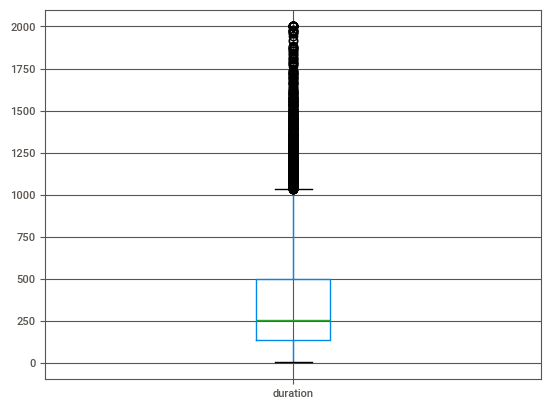

In [225]:
p = df.boxplot(column=['duration'], return_type='axes')
p.plot()
# Llindars per outliers suaus
iqr = df['duration'].quantile(0.75)-df['duration'].quantile(0.25)
iqr
upthr = df['duration'].quantile(0.75)+1.5*iqr
print("Llindar superior outliers suaus",upthr)
upthr = df['duration'].quantile(0.75)+3*iqr
print("Llindar superior outliers severs",upthr)

#### Previous
Torna a tenir una caiguda exponencial, però hi ha molts zeros, per ara els outliers extrems superiors els mantinc

Llindar superior outliers suaus 8.5
Llindar superior outliers severs 13.0


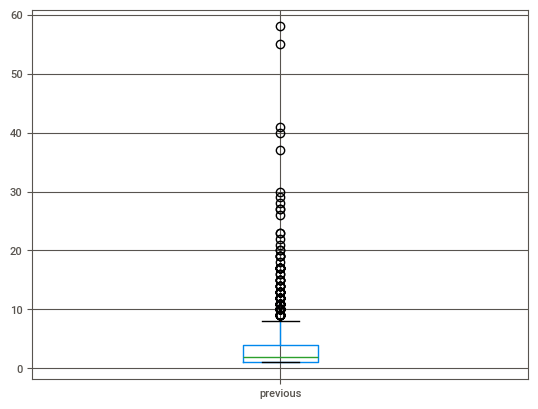

In [235]:
#p = df.boxplot(column=['previous'], return_type='axes')
#p.plot()
cols = ['previous']
df1 = df.loc[df['previous'] >0, cols]
p = df1.boxplot(column=['previous'], return_type='axes')
p.plot()
# Llindars per outliers suaus
iqr = df1['previous'].quantile(0.75)-df1['previous'].quantile(0.25)
iqr
upthr = df1['previous'].quantile(0.75)+1.5*iqr
print("Llindar superior outliers suaus",upthr)
upthr = df1['previous'].quantile(0.75)+3*iqr
print("Llindar superior outliers severs",upthr)
# Torna a tenir una cua superior, per ara no puc prendre una decisió de qué fer

#### Pdays
*Number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)*

Torna a tenir una caiguda exponencial, però hi ha molts -1 dels qui no han participat en campanyes anteriors, per ara filtro les observacions dels qui han participat en alguna campanya anterior i els outliers extrems superiors els deixo com estan, per ara.

Llindar superior outliers suaus 568.0
Llindar superior outliers severs 850.0


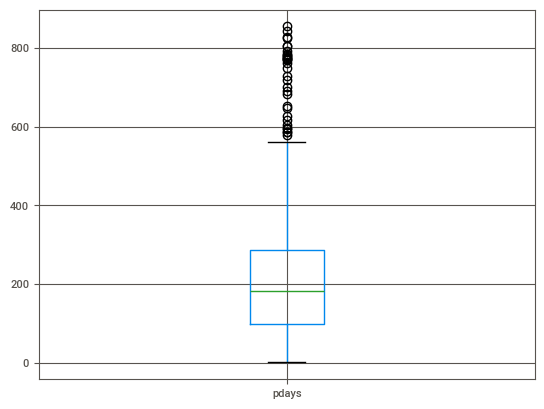

In [229]:
# Delicat, hi ha observacions -1
cols = ['pdays']
df1 = df.loc[df['pdays'] >-1, cols]
p = df1.boxplot(column=['pdays'], return_type='axes')
p.plot()
# Llindars per outliers suaus
iqr = df1['pdays'].quantile(0.75)-df1['pdays'].quantile(0.25)
iqr
upthr = df1['pdays'].quantile(0.75)+1.5*iqr
print("Llindar superior outliers suaus",upthr)
upthr = df1['pdays'].quantile(0.75)+3*iqr
print("Llindar superior outliers severs",upthr)
# No cal fer res

#### Campaign
*Number of contacts performed during this campaign and for this client (numeric, includes last contact)*

Torna a tenir una caiguda exponencial, però hi ha molts 0 dels qui no han estat localitzats a la campanya, per ara filtro les observacions dels qui no han participat en la campanya actual i els outliers extrems superiors (superiors a 35) d'aquest subconjunt els deixo com estan, per ara.

Llindar superior outliers suaus 6.0
Llindar superior outliers severs 9.0


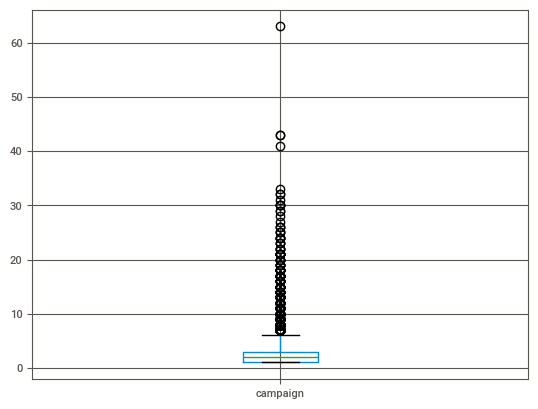

In [279]:
# Delicat, hi ha observacions 0
cols = ['campaign']
df1 = df.loc[df['campaign'] >0, cols]
p = df1.boxplot(column=['campaign'], return_type='axes')
p.plot()
# Llindars per outliers suaus
iqr = df1['campaign'].quantile(0.75)-df1['campaign'].quantile(0.25)
iqr
upthr = df1['campaign'].quantile(0.75)+1.5*iqr
print("Llindar superior outliers suaus",upthr)
upthr = df1['campaign'].quantile(0.75)+3*iqr
print("Llindar superior outliers severs",upthr)
# No cal fer res

## Comptar les categories dels factors

Massa categories en el factor job, caldrà reagrupar-les molt possiblement. Per altra banda, tots els factors amb nivell unknown i poques observacions 'unknown' cal resseguir-les, donarà problemes en la modelització (regressió logística).

**Cal remarcar que el target diposit està balancejat (Yes/No)**

In [96]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Nam

## Visualització valors nuls
No es veu res, per tant millor comptar-los

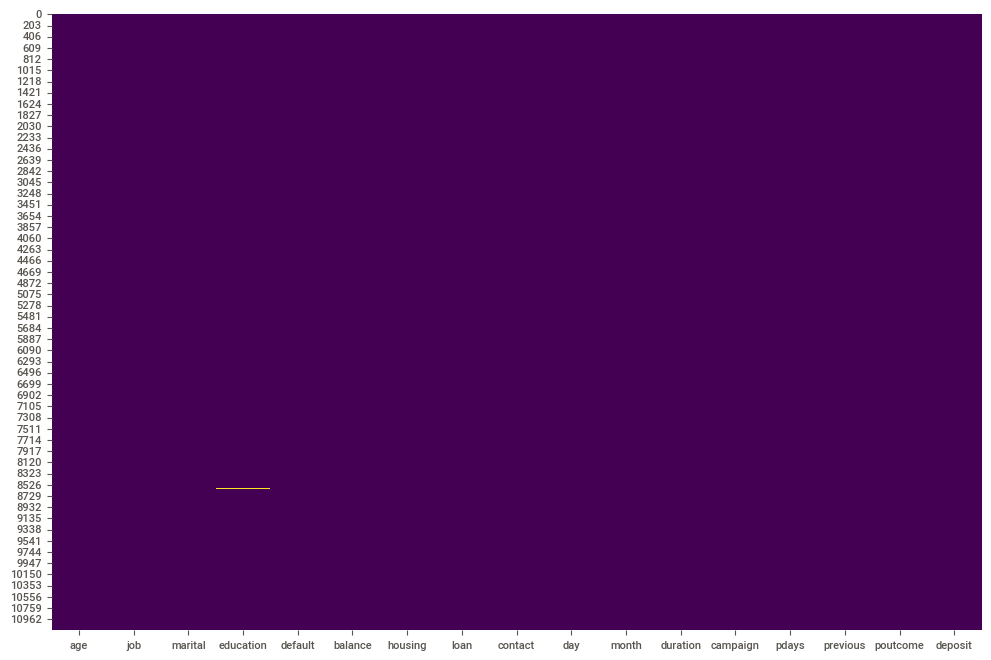

age          0
job          0
marital      5
education    7
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [151]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()
df.isnull().sum()

## Dades faltants
Marital té 3 categories i 5 missings, per tant caldria una categoria "unknown" 
Education té 10 missings i ja té definida la categoria "unknown", per tant cal assignar aquesta categoria
Age té 10 missings, es podria fer una imputació amb la mediana doncs no sé com fer imputacions més intel.ligents amb Python
No sé com fer-ho sense Stackoverflow, em mata no saber usar les funcions bàsiques en Python

In [300]:
df['age'] = df['age'].fillna(df['age'].median())
df['education'] = df['education'].fillna('unknown')
df['marital'] = df['marital'].fillna('unknown')
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Anàlisi Exploratòria univariant automatitzada amb Sweetviz

Impresionant

In [104]:
report = sv.analyze(df)
report.show_html('EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


En aquest punt m'interessa perfilar la relació de les variables numèriques amb el target deposit, ara bé, això està fet al report pels factors (basat en el que diuen un index d'incertesa, m'hauria agradat més veure un pvalor del test chi quadrat entre deposit i cadascun dels factors):

    -poutcome 0.07
    -month 0.07
    -contact 0.05
    -housing 0.03
    -job 0.02
    -loan 0.01
    -education 0.01
    -marital 0.01
    -default 0.00

I per les numèriques es pot extreure també una associació (en diu correlació, incorrecte el terme, m'agradaria veure el pvalor d'un test no paramètric tipus Kruskal-Wallis amb variable continua segons factor dipòsit o un Wilcoxon doncs té dos nivells el target que en Python és Mann-Whitney U rank test per 2 mostres independents).

    -duration 0.45
    -pdays 0.15
    -previous 0.14
    -campaign 0.13
    -balance 0.08
    -day 0.06 (aquesta variable no té sentit usar-la directament)
    -age 0.04



## Associació bivariant entre target deposit i numèriques
### pdays

MannwhitneyuResult(statistic=array([18454802.]), pvalue=array([6.23493583e-112]))


<Axes: xlabel='deposit', ylabel='pdays'>

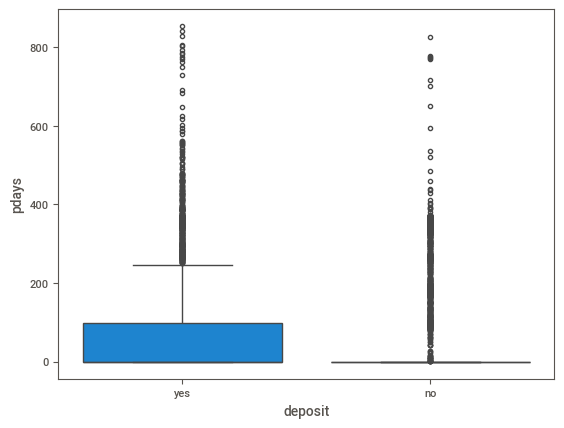

In [312]:
# Defining data groups
from scipy import stats
cols = ['pdays']
df1 = df.loc[df['deposit'] =='yes', cols]
df2 = df.loc[df['deposit'] =='no', cols] 
# Conduct the Mann-Whitney U Test 
result = stats.mannwhitneyu(df1, df2)
# Print the result
print(result)
# Vull visualitzar els boxplots de pdays a cada categoria de deposit

# create grouped boxplot  
sns.boxplot(x = df['deposit'], 
            y = df['pdays'], 
            hue = df['deposit'])


### previous

Clarament vec ara que cal tractar els outliers severs que havia detectat (per sobre de 50 trucades)

MannwhitneyuResult(statistic=array([18687529.5]), pvalue=array([2.59895934e-130]))


<Axes: xlabel='deposit', ylabel='previous'>

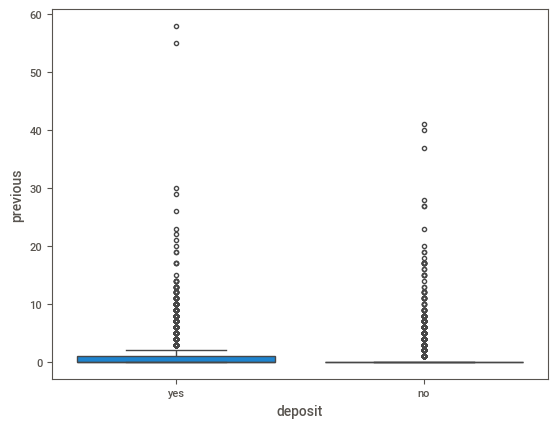

In [315]:
# Defining data groups
from scipy import stats
cols = ['previous']
df1 = df.loc[df['deposit'] =='yes', cols]
df2 = df.loc[df['deposit'] =='no', cols] 
# Conduct the Mann-Whitney U Test 
result = stats.mannwhitneyu(df1, df2)
# Print the result
print(result)
# Vull visualitzar els boxplots de previous a cada categoria de deposit
# create grouped boxplot  
sns.boxplot(x = df['deposit'], 
            y = df['previous'], 
            hue = df['deposit'])


## Associació bivariant entre target deposit i factors
### poutcome

deposit     no   yes
poutcome            
failure    610   618
other      230   307
success     93   978
unknown   4940  3386
deposit         no       yes
poutcome                    
failure   0.496743  0.503257
other     0.428305  0.571695
success   0.086835  0.913165
unknown   0.593322  0.406678
deposit         no       yes
poutcome                    
failure   0.103865  0.116846
other     0.039162  0.058045
success   0.015835  0.184912
unknown   0.841137  0.640197
The Chisq Stat, degrees of freedom and P-Value of the ChiSq Test are: 1004.635780185333 3 1.7761850102620281e-217


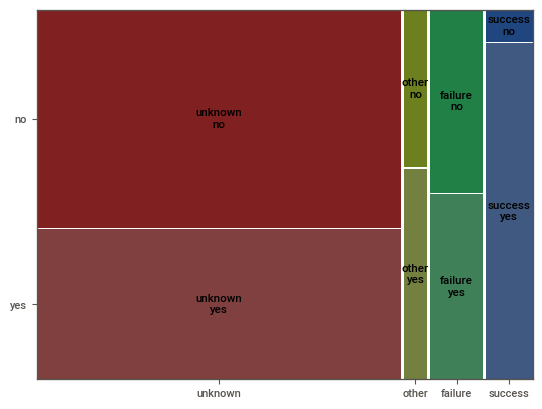

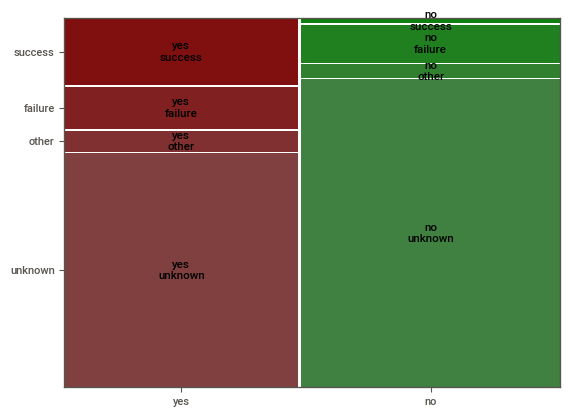

In [339]:
CrosstabResult = pd.crosstab(index=df['poutcome'], columns=df['deposit'])
print(CrosstabResult)
CrosstabRows = pd.crosstab(index=df['poutcome'], columns=df['deposit'], normalize="index")
print(CrosstabRows)
CrosstabCols = pd.crosstab(index=df['poutcome'], columns=df['deposit'], normalize="columns")
print(CrosstabCols)

# Mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['poutcome', 'deposit'])
mosaic(df, [ 'deposit', 'poutcome'])
# importing the required function
from scipy.stats import chi2_contingency
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
print('The Chisq Stat, degrees of freedom and P-Value of the ChiSq Test are:', ChiSqResult[0], ChiSqResult[2], ChiSqResult[1])

Clarament els qui van contractar en una campanya anterior un dipòsit, tenen una probabilitat per sobre el 90% de contractar-ne un altre a la campanya actual, tantmateix si no van contractar-lo no afecta a la situació actual, però si són nous en les campanyes, aleshores és una mica inferior la probabilitat de contractar.

# Conclusions

Després de l'EDA univariant and bivariant (perfilar target) es té una comprensió més fina de les característiques del dataset. 
He anat inserint els comentaris/conclusions de cada apartat entre les cel.les de codi. Hauria trigat 30 min a fer-ho en RStudio i en Python he hagut d'usar intensivament StackOverflow bàsic i altres adreces per internet (m'he autoimposat la disciplina en aquest curs de NO tocar Chatgpt ni cap altre plataforma equivalent).